<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/%5BAnswer%5D_Supermarket_December_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kwandy Chandra - 0706022210001
## Week 13  Data Mining(R) - B

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [70]:
url = 'https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx'
df = pd.read_excel(url)
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [72]:
df.isna().sum()

,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [73]:
columns = ['ITEM', 'NO_BKT', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER', 'TGL_TRANS']
if all(col in df.columns for col in columns):
    df_cleaned = df[columns]

In [74]:
df_cleaned.isnull().sum()

,0
ITEM,3
NO_BKT,3
KEL,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3
USER,3
TGL_TRANS,3


In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_cleaned.isnull().sum()

,0
ITEM,0
NO_BKT,0
KEL,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0
USER,0
TGL_TRANS,0


In [76]:
df_cleaned['TGL_TRANS'] = pd.to_datetime(df_cleaned['TGL_TRANS'], format='%m/%d/%Y')

In [77]:
top_products = (
    df_cleaned.groupby('KEL')['QTY']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [78]:
print(top_products)

KEL
MIE        40367.0
SUSU KT    34395.0
SUSU       30108.0
SABUN.M    18827.0
PAMPERS    18538.0
SNACK      16815.0
MINUMAN    16601.0
BISCPAK    14648.0
AIR.M      12717.0
DETERJN    12106.0
Name: QTY, dtype: object


In [79]:
total_unit_sold = df_cleaned['QTY'].sum()
average_basket_size = df_cleaned.groupby('NO_BKT')['QTY'].sum().mean()

print("Total Unit Sold in January:", total_unit_sold)
print("Average Basket Size:", average_basket_size)

Total Unit Sold in January: 469690.0
Average Basket Size: 12.837269049961735


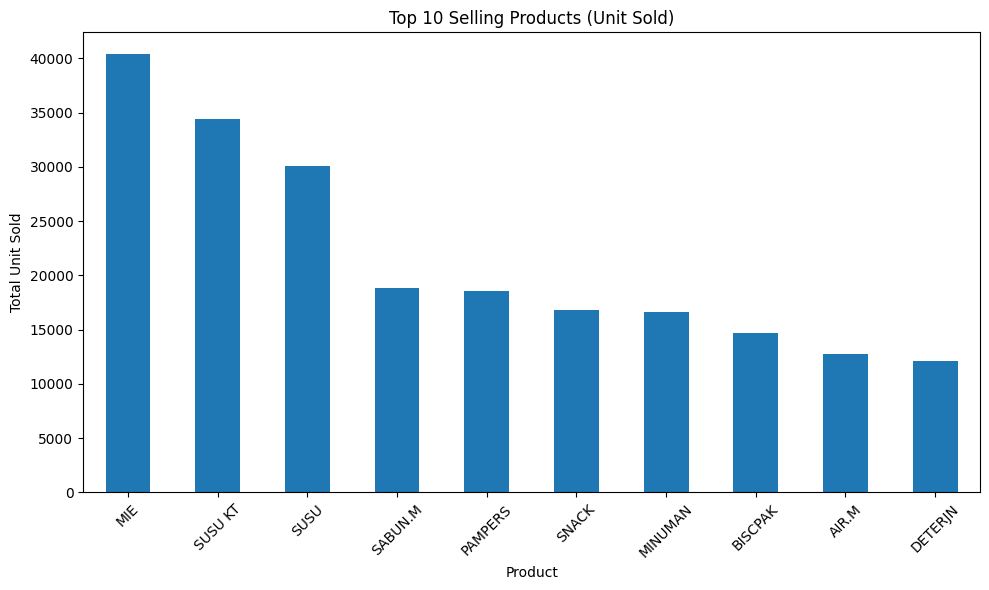

In [80]:
top_products = df_cleaned.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products (Unit Sold)')
plt.xlabel('Product')
plt.ylabel('Total Unit Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

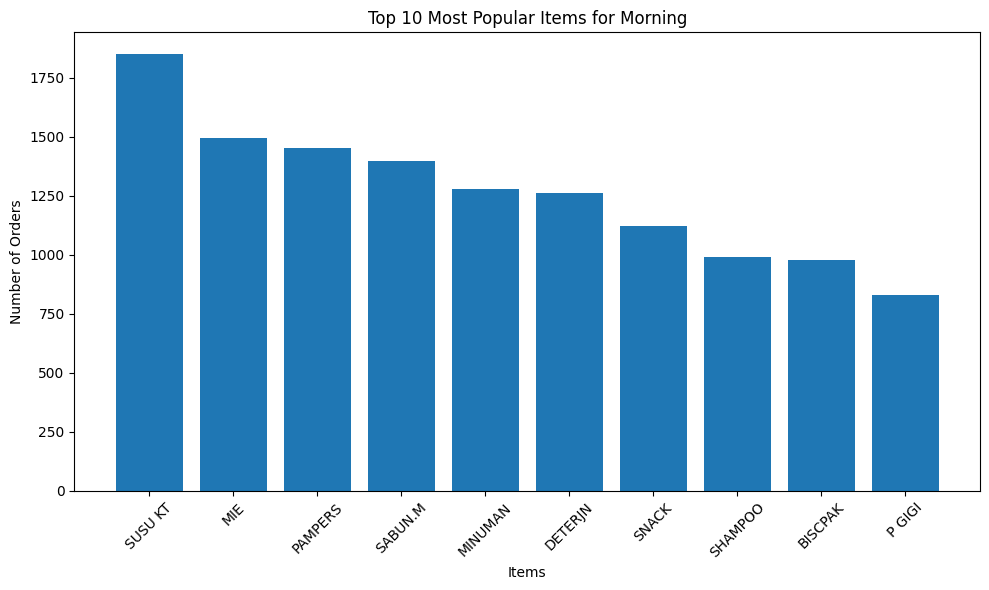

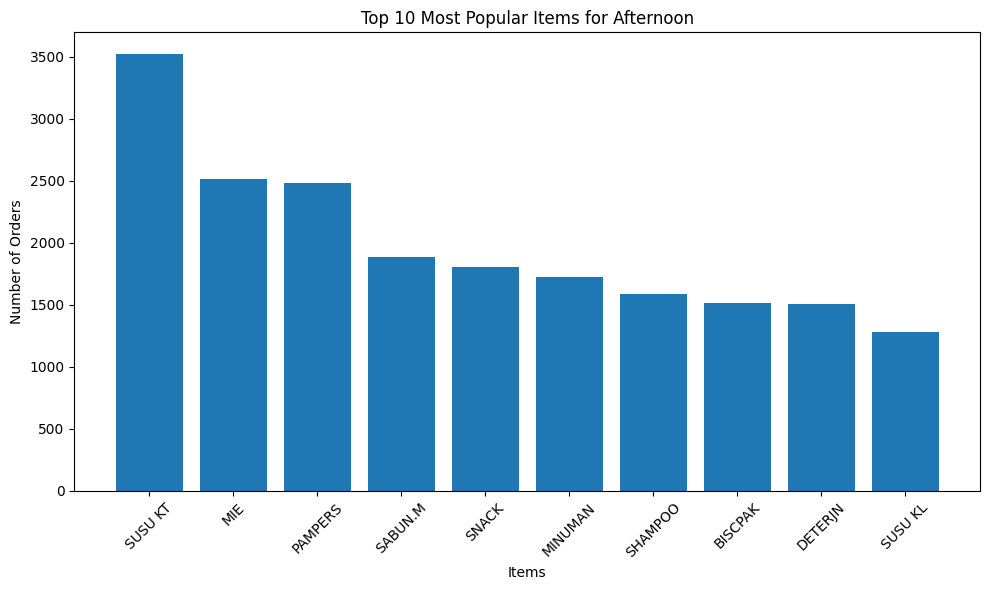

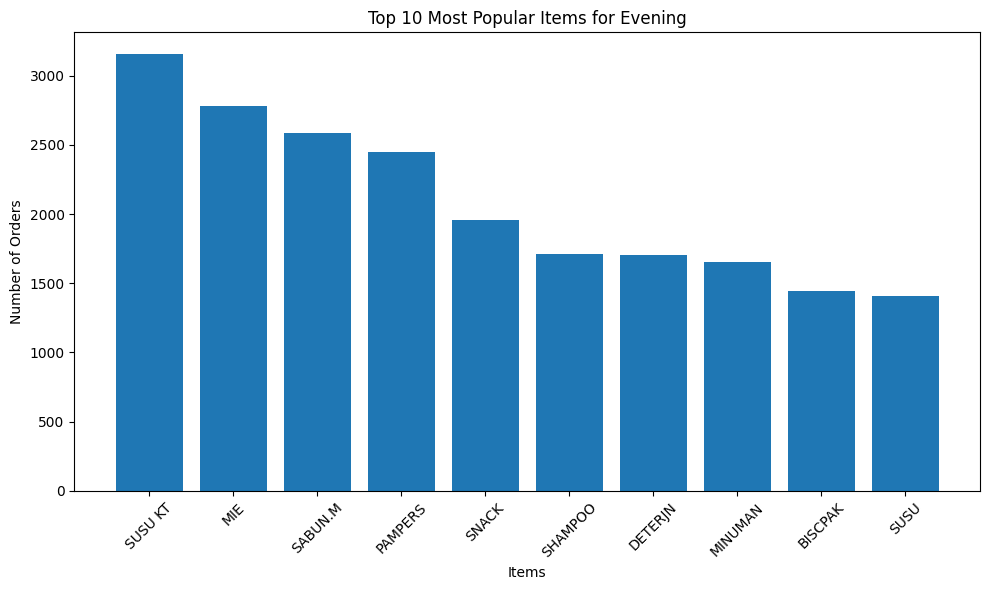

In [81]:
df_cleaned['Jam'] = pd.to_datetime(df_cleaned['JAM'], format='%H:%M:%S', errors='coerce').dt.hour
bins = [6, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening']
df_cleaned['period_day'] = pd.cut(df_cleaned['Jam'], bins=bins, labels=labels, right=False)

item_counts_by_period = df_cleaned.groupby(['period_day', 'KEL']).size().reset_index(name='count')

top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()
for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))
    plt.bar(data['KEL'], data['count'])
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


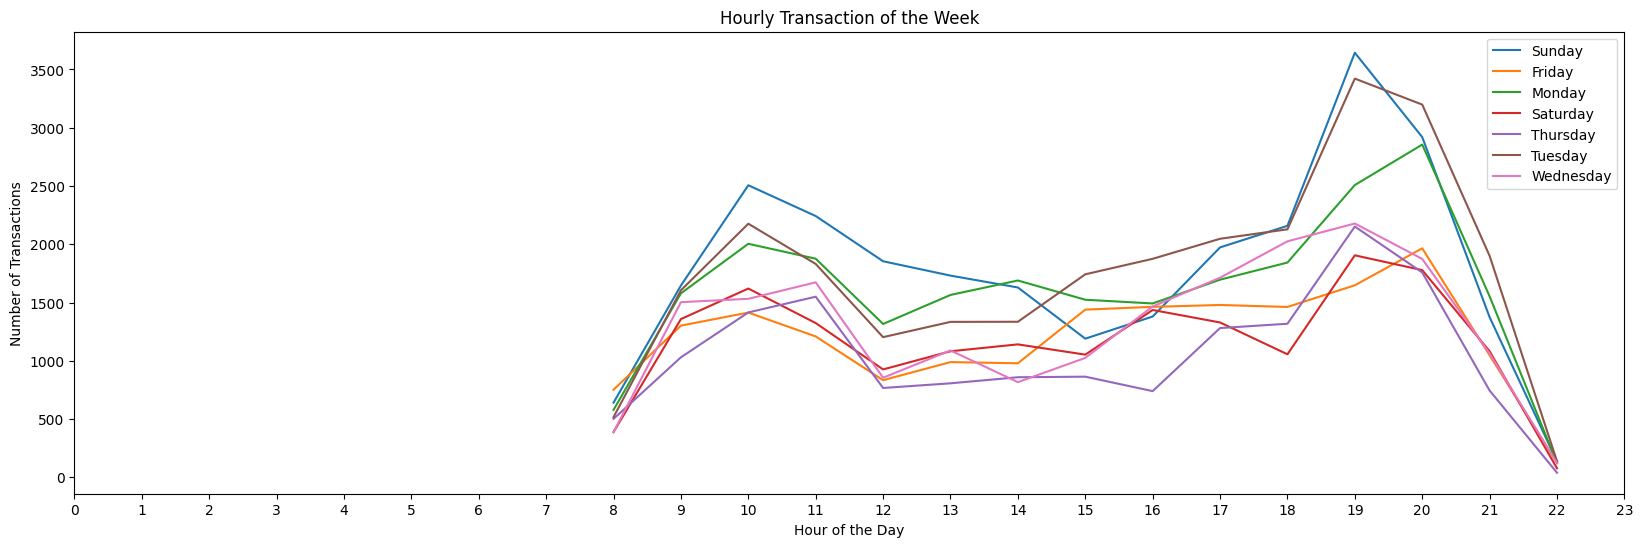

In [82]:
df_cleaned['day_name'] = df_cleaned['TANGGAL'].dt.day_name()
df_cleaned['Jam'] = pd.to_datetime(df_cleaned['JAM'], format='%H:%M:%S', errors='coerce').dt.hour
hourly_transactions = df_cleaned.groupby(['day_name', 'Jam'])['QTY'].count().reset_index()

# Filter for the specified days (Sunday to Wednesday)
days_to_show = ['Sunday', 'Friday', 'Monday', 'Saturday', 'Thursday','Tuesday', 'Wednesday',]
filtered_transactions = hourly_transactions[hourly_transactions['day_name'].isin(days_to_show)]

plt.figure(figsize=(20, 6))
for day in days_to_show:
    day_data = filtered_transactions[filtered_transactions['day_name'] == day]
    plt.plot(day_data['Jam'], day_data['QTY'], label=day)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction of the Week')
plt.legend()
plt.xticks(range(24))
plt.show()

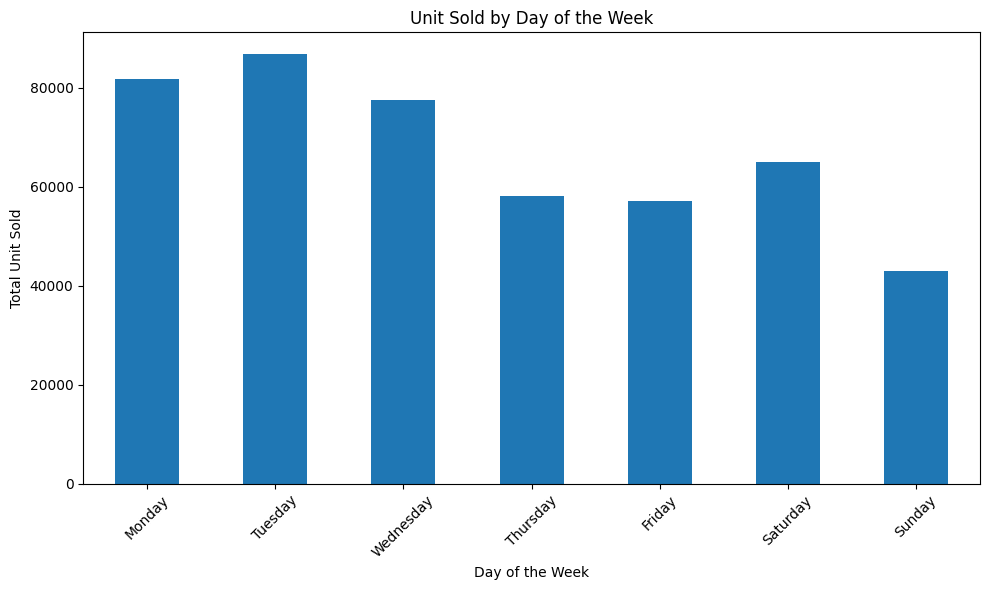

In [83]:
weekday_sales = df_cleaned.groupby('day_name')['QTY'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar')
plt.title('Unit Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Unit Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

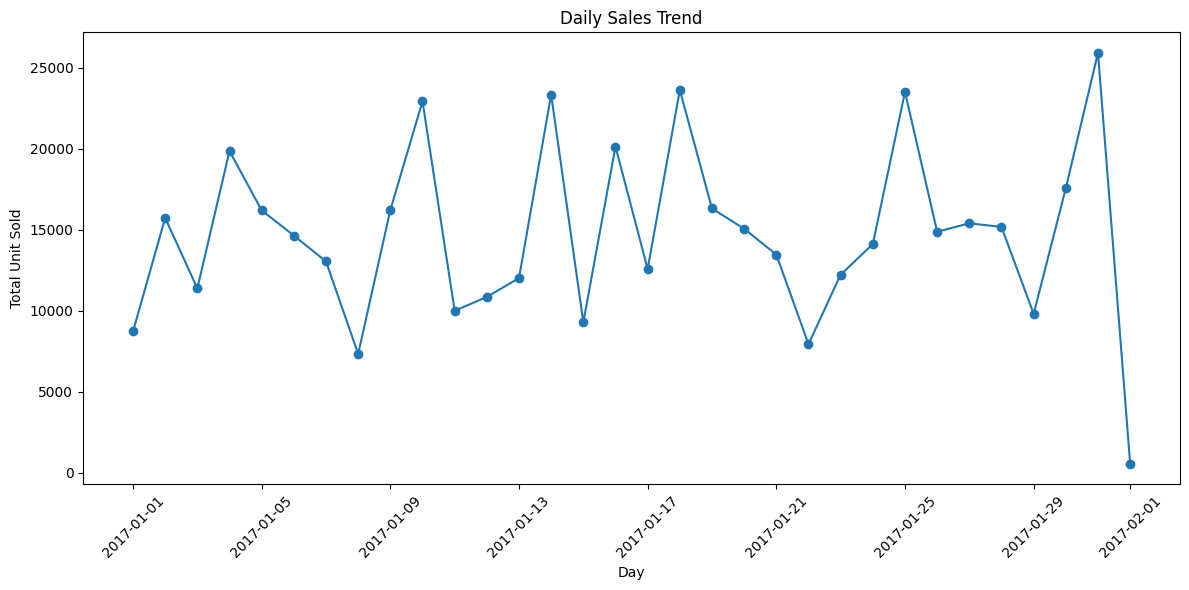

In [84]:
df_cleaned['Day'] = df_cleaned['TANGGAL'].dt.date
daily_trend = df_cleaned.groupby(['Day'])['QTY'].sum().reset_index()

# Line chart for daily sales with day names
plt.figure(figsize=(12, 6))
plt.plot(daily_trend['Day'], daily_trend['QTY'], marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Total Unit Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
basket = pd.crosstab(df_cleaned['NO_BKT'], df_cleaned['KEL'])
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True) # support 0.03 keatas gaada pair barang
frequent_itemsets[['support', 'itemsets']]

,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [90]:
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="lift", min_threshold=1.0)
print("Association Rules:")
rules

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,1.0,0.017587,1.374112,0.859642,0.198666,0.272258,0.332026
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,1.0,0.017587,1.422504,0.854699,0.198666,0.297014,0.332026
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,1.0,0.016664,1.276137,0.781831,0.167059,0.216385,0.286534
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,1.0,0.016664,1.299612,0.777817,0.167059,0.230540,0.286534
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,1.0,0.024019,1.428902,0.949505,0.279160,0.300162,0.486948
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,1.0,0.024019,2.572131,0.909105,0.279160,0.611217,0.486948
6,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,1.0,0.010074,1.168998,0.458101,0.106116,0.144567,0.215561
7,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,1.0,0.010074,1.070678,0.503678,0.106116,0.066012,0.215561
8,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,1.0,0.009958,1.083600,0.561667,0.105499,0.077150,0.208922
9,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,1.0,0.009958,1.179030,0.523064,0.105499,0.151845,0.208922


## **Market Basket Analysis Insights**

The association rules from the analysis reveal several strong pairings between products. Key insights include:

1. **Snacks and Biscuit Packs (SNACK & BISCPAK)**  
   - Confidence: 31.85%-34.55%, Lift: 5.01  
   - These products are frequently bought together, indicating a strong complementary relationship. Customers buying snacks are highly likely to also purchase biscuit packs, suggesting a clear opportunity to cross-sell.

2. **Detergents and Fabric Softeners (DETERJN & SOFTENR)**  
   - Confidence: 33.01%-64.37%, Lift: 7.70  
   - This pairing shows a strong association. Customers purchasing detergent often buy fabric softeners, which is a logical complement for laundry needs.

3. **Shampoo and Body Soap (SHAMPOO & SABUN.M)**  
   - Confidence: 45.07%-47.82%, Lift: 5.46  
   - This pairing highlights a natural combination of products for personal care, suggesting customers tend to buy these together for their hygiene routines.

4. **Toothpaste and Shampoo/Body Soap (P GIGI, SHAMPOO, & SABUN.M)**  
   - Combined confidence: 59.13%-63.60%, Lift: 6.12-8.03  
   - These products form a "personal care bundle" and show significant cross-purchasing trends.

5. **Pampers and Personal Care Products (PAMPERS with SHAMPOO/SABUN.M)**  
   - Confidence: 15.16%-26.45%, Lift: 1.83-1.89  
   - Pampers, as a baby-care product, often leads customers to purchase other hygiene-related items, likely due to family-oriented shopping habits.

6. **Instant Noodles and Detergents (MIE & DETERJN)**    --UNIQUE--
   - Confidence: 27.82%-29.49%, Lift: 3.53  
   - A surprising trend, this suggests that customers buying daily essentials like noodles often purchase cleaning supplies as well.

---

## **Placement Ideas**

Based on these insights, the following layout adjustments are recommended to maximize cross-selling opportunities:

1. **Create a Snacks Zone**  
   - **Action**: Place snacks and biscuit packs (SNACK & BISCPAK) in close proximity. Use endcaps near checkout counters to increase visibility and encourage impulse purchases.
   - **Reason**: Their strong pairing and snackable nature make them ideal for last-minute buys.

2. **Design a Laundry Care Aisle**  
   - **Action**: Place detergents and fabric softeners (DETERJN & SOFTENR) together in the same aisle. Include related items like bleach and stain removers in the same zone.
   - **Reason**: Customers buying detergents will naturally be drawn to other laundry care products, boosting overall basket size.

3. **Personal Care Bundle Section**  
   - **Action**: Group toothpaste, shampoo, and body soap (P GIGI, SHAMPOO, & SABUN.M) in a dedicated section. Use clear signage to suggest these as part of a hygiene bundle.
   - **Reason**: Their strong association and complementary usage make it easier for customers to shop all their personal care needs in one place.

4. **Family Essentials Zone**  
   - **Action**: Group baby-care products like Pampers with personal care items and household products. Feature promotions like "Baby + Hygiene Essentials Combo" to attract family shoppers.
   - **Reason**: The association between Pampers and items like shampoo and body soap reflects a family-oriented shopping trend.

5. **Essentials Cluster for Daily Needs**  
   - **Action**: Pair instant noodles (MIE) with cleaning products (DETERJN). Position them near the front of the store for convenience-focused shoppers.
   - **Reason**: This surprising association indicates that customers shopping for quick meals often add household essentials to their baskets.

6. **Impulse Purchase Areas**  
   - **Action**: Place top-selling and strongly associated items (e.g., snacks, drinks, toothpaste) in high-traffic zones like entryways or near checkouts.
   - **Reason**: These items have a high probability of triggering impulse buys, increasing average spend per customer.

---
- **Seasonal Promotions**: Highlight hygiene products and snacks, which might see increased demand post-holiday (January resolutions and gatherings).
- **Signage and Suggestions**: Use signs like "Complete Your Laundry Care" or "Personal Hygiene Essentials" to subtly nudge customers to buy associated products.
- **Track Changes**: Monitor sales performance after layout adjustments to evaluate effectiveness and further refine strategies.